In [1]:
import cobra
import pandas as pd
import os
from os.path import join
from cobra import Model, Reaction, Metabolite
from cobra.sampling import sampling
import numpy as np
# os.environ["R_HOME"] = f"{os.environ['CONDA_PREFIX']}\\Lib\\R"
# import rpy2.robjects
from plotnine import *
import matplotlib.pyplot as plt


In [2]:
# Importing the model
model1=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
model1.objective =  'BIOMASS_RT' #"ATPM" 
solution1 = model1.optimize() # 'minimize'
# All fluxes
all_fluxes = solution1.fluxes.to_frame(name='Flux')

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-21


In [3]:
# Lab data
glucose_uptakes= [0.476, 1.114, 1.648, 2.31, 2.67, 3.1] # the fifth glc uptake value was calculated
# growth_rates = [0.03, 0.08, 0.12, 0.17, 0.20, 0.23] # growth_rates = [0.049, 0.100, 0.151, 0.203, 0.25, 0.301]
XPK_bounds =   [0.181042, 0.440304, 0.729, 0.81, 1.069314, 1.247297]



In [4]:
# Get all fluxes on different glucose uptake
all_fluxes_ATPM_min_forced_XPK = pd.DataFrame(columns=[ 'Growth rate','Glucose uptake', *all_fluxes.index], index=range(len(glucose_uptakes))) #flux_values.index gives the row names column, * extracts the list of strings

for i in range(len(glucose_uptakes)):
    model=cobra.io.read_sbml_model("C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\Rt_IFO0880_jsb.xml")
    model.objective = "BIOMASS_RT"     
    model.reactions.EX_glc__D_e.bounds = -(glucose_uptakes[i]), -(glucose_uptakes[i])
    # model.reactions.BIOMASS_RT.bounds = growth_rates[i], growth_rates[i]
    model.reactions.XPK.bounds = XPK_bounds[i], XPK_bounds[i]

    solution = model.optimize() #'minimize'
    all_fluxes_ATPM_min_forced_XPK.loc[i] = solution.fluxes[[ 'BIOMASS_RT','EX_glc__D_e', *all_fluxes.index]].values

all_fluxes_ATPM_min_forced_XPK

,Growth rate,Glucose uptake,ALCD25yi,MTHFCm,AMPN,DAGCPTer_RT,PYRt2,NNDPRm,HMGCOASm,PDE4,...,BTNt2i,EX_fol_e,FOLt,NADtm,EX_pydxn_e,PYDXNtr,RIBFLVt2,tr_0001,EXC_OUT_phyto_d,MDHc
0,0.033818,-0.476,0.0,0.0,0.0,0.0,0.0,0.0,-0.00006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.057883
1,0.082142,-1.114,0.0,0.0,0.0,0.0,0.0,0.0,-0.000145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.055876
2,0.122349,-1.648,0.0,0.0,0.0,0.0,0.0,0.0,-0.000216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.097327
3,0.172808,-2.31,0.0,0.0,0.0,0.0,0.0,0.0,-0.000305,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.20013
4,0.19999,-2.67,0.0,0.0,0.0,0.0,0.0,0.0,-0.000353,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.099701
5,0.232553,-3.1,0.0,0.0,0.0,0.0,0.0,0.0,-0.00041,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.112061


In [5]:
# Get specific metabolites with their fluxes
exchange_fluxes_table = all_fluxes_ATPM_min_forced_XPK[['BIOMASS_RT', 'EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']]
exchange_fluxes_table

,BIOMASS_RT,EX_glc__D_e,EX_o2_e,EX_nh4_e,EX_so4_e,EX_pi_e,EX_co2_e
0,0.033818,-0.476,-1.144635,-0.223211,-0.00339,-0.009003,1.2714
1,0.082142,-1.114,-2.527215,-0.542163,-0.008234,-0.021868,2.835119
2,0.122349,-1.648,-3.696579,-0.807538,-0.012264,-0.032571,0.0
3,0.172808,-2.31,-5.115092,-1.140585,-0.017322,-0.046004,5.762851
4,0.19999,-2.67,-5.899588,-1.31999,-0.020047,-0.05324,6.649234
5,0.232553,-3.1,-6.831751,-1.534915,-0.023311,-0.061909,7.697629


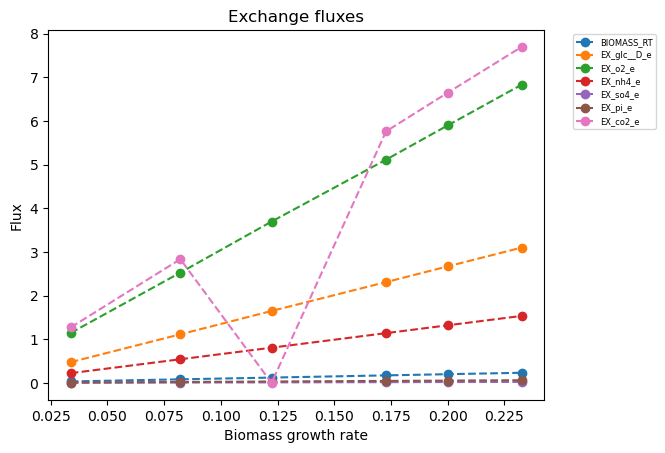

In [6]:
# Exchange fluxes plot
GR_range = all_fluxes_ATPM_min_forced_XPK['BIOMASS_RT']
plt.plot(GR_range, np.abs(exchange_fluxes_table[exchange_fluxes_table.columns]), 'o--', label = exchange_fluxes_table.columns)

plt.xlabel('Biomass growth rate')
plt.ylabel('Flux'
           )
plt.title("Exchange fluxes")
plt.legend(fontsize=6, loc='upper left', bbox_to_anchor=(1.05, 1))
# plt.yticks(range(0, 20, 1))
plt.show()

In [7]:
PPP_fluxes = all_fluxes_ATPM_min_forced_XPK[['BIOMASS_RT', 'EX_glc__D_e', 'G6PDH2r', 'TKT1', 'TALA','TKT2', 'XPK', 'FBA', 'PYRDC','PDHm', 'FPK']]

PPP_fluxes = PPP_fluxes.rename(columns = {'G6PDH2r': 'oxpp'})

PPP_fluxes

,BIOMASS_RT,EX_glc__D_e,oxpp,TKT1,TALA,TKT2,XPK,FBA,PYRDC,PDHm,FPK
0,0.033818,-0.476,0.0,-0.076405,-0.076405,-0.082735,0.181042,0.230851,0.031079,0.419896,0.0
1,0.082142,-1.114,0.0,-0.185771,-0.703944,-0.201146,0.440304,0.0,0.075489,0.93518,0.0
2,0.122349,-1.648,0.07094,-0.277447,-0.277447,-0.300347,0.729,0.688098,0.07964,1.330746,0.0
3,0.172808,-2.31,0.043345,-0.337605,-1.457206,-0.36995,0.81,0.0,0.158812,1.963291,0.0
4,0.19999,-2.67,0.027795,-0.442133,-1.654011,-0.479565,1.069314,0.0,0.183792,2.18493,0.0
5,0.232553,-3.1,0.037231,-0.513777,-1.91402,-0.557304,1.247297,0.0,0.213718,2.526992,0.0


In [8]:
ATPM_ACITL_fluxes = all_fluxes_ATPM_min_forced_XPK[['BIOMASS_RT', 'EX_glc__D_e', 'ATPM', 'ACITL']] #ACS - Acetyl-CoA synthetase
ATPM_ACITL_fluxes

,BIOMASS_RT,EX_glc__D_e,ATPM,ACITL
0,0.033818,-0.476,1.22,0.000565
1,0.082142,-1.114,1.22,0.000808
2,0.122349,-1.648,1.22,0.0
3,0.172808,-2.31,1.22,0.117996
4,0.19999,-2.67,1.22,0.004649
5,0.232553,-3.1,1.22,0.001532


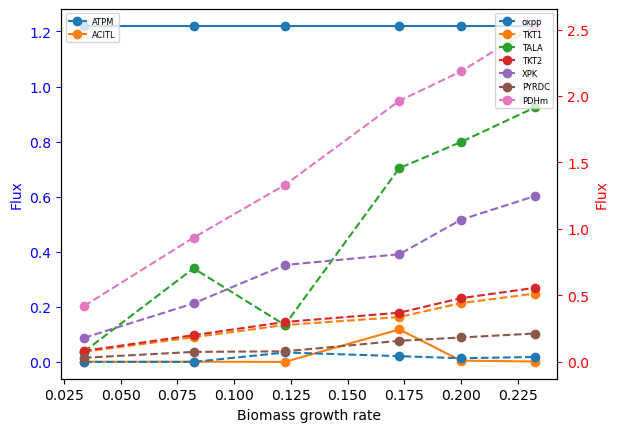

In [9]:
# Plot the PPP enzymes fluxes with ATPM and ACITL on seperate y-axis
GR_range = all_fluxes_ATPM_min_forced_XPK['BIOMASS_RT']
# Sample data
x = GR_range
y1 = np.abs(ATPM_ACITL_fluxes[['ATPM', 'ACITL']])
y2 = np.abs(PPP_fluxes[['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm']])

# # Define colors for each label
# colors = {'ATPM': 'black', 'ACITL': 'orange', 'oxpp': 'yellow', 'TKT1': 'green', 'TKT2': 'blue', 'TALA': 'red', 'XPK': 'pink','PYRDC': 'brown' ,'PDHm': 'purple'}
# labels = ['ATPM', 'ACITL', 'oxpp', 'TKT1', 'TKT2', 'TALA', 'XPK','PYRDC','PDHm']
# Create the first plot
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'o-', label=['ATPM', 'ACITL'])
ax1.set_xlabel('Biomass growth rate')
ax1.set_ylabel('Flux', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(fontsize=6, loc='upper left')

# Create the second y-axis on the right
ax2 = ax1.twinx()

# Plot the second set of data on the right y-axis 
ax2.plot(x, y2, 'o--', label=['oxpp', 'TKT1', 'TALA','TKT2', 'XPK','PYRDC','PDHm'])
ax2.set_ylabel('Flux', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(fontsize=6, loc='upper right')

# Show the plot
plt.show()

In [10]:
# # Get all fluxes to excel
# with pd.ExcelWriter('C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\SImulations_w_XPK_bounds\\all_fluxes_XPK_bounds_NGAM_min.xlsx') as excel_writer:
#     all_fluxes_ATPM_min.to_excel(excel_writer, sheet_name='Sheet1', index=True)

In [11]:
# # # # #  Get csv files
# i = 1
# all_fluxes_ATPM_min.loc[i].to_csv(f'C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Results\\Rt_IFO0880_jsb_results\\SImulations_w_XPK_bounds\\all_fluxes_NGAM_min_XPK_bounds_GR_{growth_rates[i]}.csv', index=True)